<a href="https://colab.research.google.com/github/ProjectPortfolio/portfolio/blob/master/Multiclass_logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
dataset = pd.read_csv('/content/insurance.csv')

In [22]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
dataset.isnull().sum() #checking null value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

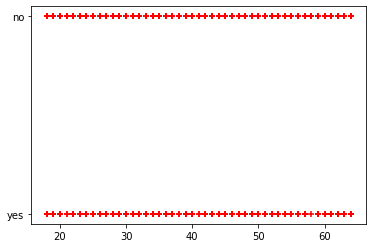

In [24]:
#data exploration will perform for that use scatterplot
#for x use  age and for y use smoker
plt.scatter(dataset.age,dataset.smoker,marker='+',color='red')

In [26]:
#check categories in particular domain
dataset.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [27]:
dataset.sex.unique()

array(['female', 'male'], dtype=object)

In [28]:
dummies = pd.get_dummies(dataset.sex)


In [29]:
dummies

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [31]:
merge_dataset = pd.concat([dataset,dummies],axis='columns')

In [33]:
merge_dataset.drop(['sex'],axis='columns')

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,0,1
1334,18,31.920,0,no,northeast,2205.98080,1,0
1335,18,36.850,0,no,southeast,1629.83350,1,0
1336,21,25.800,0,no,southwest,2007.94500,1,0


In [34]:
df = dataset.copy()



In [35]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()
merge_dataset.region = le.fit_transform(merge_dataset.region)

In [42]:
merge_dataset

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,3,16884.92400,1,0
1,18,male,33.770,1,no,2,1725.55230,0,1
2,28,male,33.000,3,no,2,4449.46200,0,1
3,33,male,22.705,0,no,1,21984.47061,0,1
4,32,male,28.880,0,no,1,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,1,10600.54830,0,1
1334,18,female,31.920,0,no,0,2205.98080,1,0
1335,18,female,36.850,0,no,2,1629.83350,1,0
1336,21,female,25.800,0,no,3,2007.94500,1,0


In [46]:
merge_dataset.smoker=le.fit_transform(merge_dataset.smoker)
merge_dataset

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,1,3,16884.92400,1,0
1,18,male,33.770,1,0,2,1725.55230,0,1
2,28,male,33.000,3,0,2,4449.46200,0,1
3,33,male,22.705,0,0,1,21984.47061,0,1
4,32,male,28.880,0,0,1,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,1,10600.54830,0,1
1334,18,female,31.920,0,0,0,2205.98080,1,0
1335,18,female,36.850,0,0,2,1629.83350,1,0
1336,21,female,25.800,0,0,3,2007.94500,1,0


In [48]:
from sklearn.model_selection import train_test_split
X = merge_dataset[['age','bmi','charges','region','male','female']]
Y = merge_dataset['smoker']


In [49]:
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size= 0.2)

In [51]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

In [54]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
model.predict_proba(X_test)

array([[9.97324129e-01, 2.67587072e-03],
       [9.98844936e-01, 1.15506365e-03],
       [2.70175022e-03, 9.97298250e-01],
       [9.98892638e-01, 1.10736234e-03],
       [9.98825148e-01, 1.17485199e-03],
       [5.47590302e-01, 4.52409698e-01],
       [9.99840219e-01, 1.59780623e-04],
       [5.01181554e-01, 4.98818446e-01],
       [1.01176967e-01, 8.98823033e-01],
       [9.98117248e-01, 1.88275234e-03],
       [1.91424863e-01, 8.08575137e-01],
       [9.82832664e-01, 1.71673358e-02],
       [9.99732558e-01, 2.67441576e-04],
       [9.49410714e-01, 5.05892863e-02],
       [7.34286288e-03, 9.92657137e-01],
       [9.93528262e-01, 6.47173840e-03],
       [9.98166874e-01, 1.83312585e-03],
       [9.99678637e-01, 3.21362783e-04],
       [9.94652401e-01, 5.34759869e-03],
       [9.82820334e-01, 1.71796656e-02],
       [9.89704413e-01, 1.02955873e-02],
       [9.97946287e-01, 2.05371303e-03],
       [9.94679905e-01, 5.32009499e-03],
       [9.62003602e-01, 3.79963981e-02],
       [9.641114

In [62]:
model.score(X_test,y_test)

0.9477611940298507

In [71]:
model.predict([[10,27,20996,2,1,1]])

array([1])